# Logistic Regression

week3のLogistic Regressionの課題について

In [1]:
import math
import numpy as np
from scipy import optimize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Visualizing the data

In [2]:
df_train = pd.read_csv("ex2data1.txt", names=('exam1', 'exam2', 'result'))
df_train.head(5)

,exam1,exam2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# クラス毎にデータを分ける
df_pos = df_train.ix[df_train['result'] == 1]
df_neg = df_train.ix[df_train['result'] == 0]

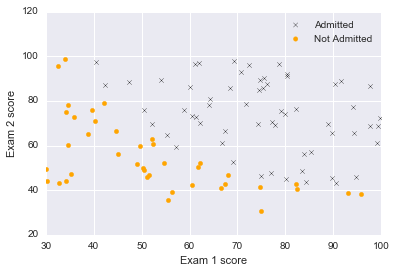

In [4]:
def plot_data():
    fig = plt.figure()
    plt.xlim(30, 100)
    plt.ylim(20, 120)

    ax = fig.add_subplot(1,1,1)
    ax.scatter(df_pos['exam1'], df_pos['exam2'],
               color='black', marker='x', label='Admitted')
    ax.scatter(df_neg['exam1'], df_neg['exam2'],
               color='orange', marker='o', label='Not Admitted')
    ax.legend()
    ax.set_xlabel('Exam 1 score')
    ax.set_ylabel('Exam 2 score')
    return ax

plot_data()
plt.savefig('week03_lr_train.png')

## Evaluating logistic regression

In [5]:
%run "logistic_regression.py"

### Sigmoid function

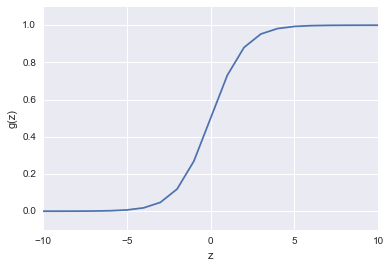

In [6]:
fig = plt.figure()
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
ax = fig.add_subplot(1, 1, 1)

z = np.arange(-10, 11, 1)
ax.plot(z, sigmoid(z))
ax.set_xlabel('z')
ax.set_ylabel('g(z)')
plt.savefig('week03_sigmoid.png')

### Cost function and gradient

In [7]:
X = np.c_[df_train['exam1'], df_train['exam2']]
X = np.c_[np.ones((len(X), 1)), X]

y = np.array(df_train['result'])
y = y.reshape(len(y), 1)

initial_theta = np.zeros((X.shape[1],1))

In [8]:
J = compute_cost(initial_theta, X, y)
grad = compute_grad(initial_theta, X, y)

J, grad

(0.69314718055994529, array([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]]))

### Calculate theta

In [13]:
theta = compute_theta(initial_theta, X, y)
theta

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 103
         Function evaluations: 236
         Gradient evaluations: 236


array([-25.15360801,   0.20617001,   0.201409  ])

### Plotting descision boundary

In [14]:
X_min, X_max = min(X[:,1]), max(X[:,1])
X_vals = np.linspace(X_min, X_max, 100)
y_vals = [- (theta[0] / theta[2]) - (theta[1] / theta[2]) * x for x in X_vals]

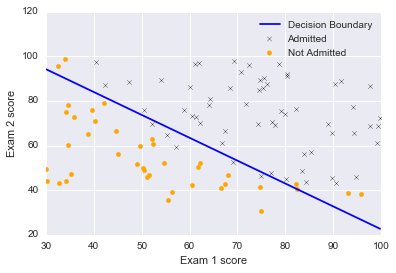

In [15]:
ax = plot_data()
ax.plot(X_vals, y_vals, color='blue', label='Decision Boundary')
ax.legend()
plt.savefig('week03_lr_boundary.png')